# 5.1 week 2 review

In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set_style('whitegrid')

%matplotlib inline


In [2]:
path_to_file = '/Users/katbishop/Desktop/DSI-SF2-bishopkd/datasets/titanic/titanic_clean.csv' ## Change it to your path
titanic = pd.read_csv(path_to_file)
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S


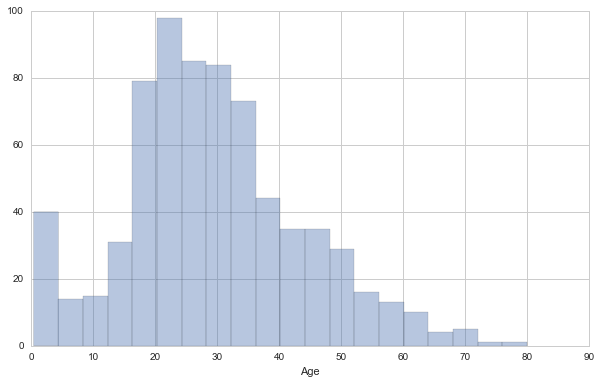

In [70]:
# plot a hist of age using seaborn
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
 
ax = sns.distplot(titanic['Age'], kde=False, ax=ax)

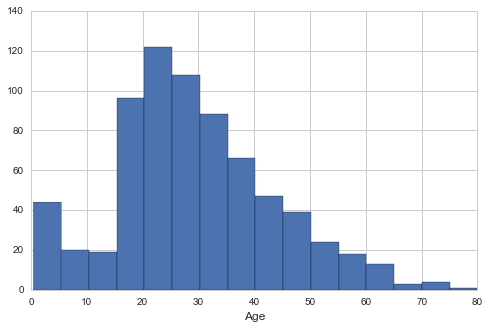

In [24]:
# hist with matplotlib
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.hist(titanic['Age'], bins=16)
plt.xlabel('Age', size=12)
plt.show()

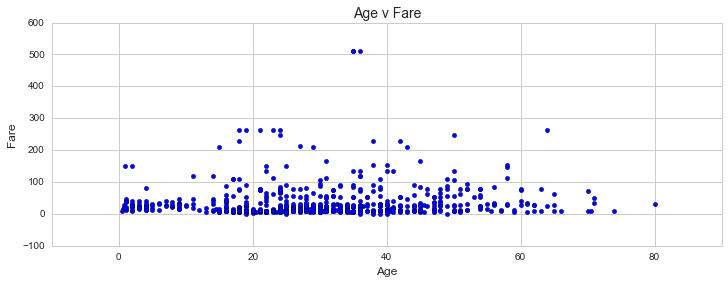

In [47]:
# using matplotlib, make a scatterplot of age vs fare

fig = plt.figure(figsize=(12,4))
ax = fig.gca()
x = titanic['Age']
y = titanic['Fare']

ax.set_xlabel('Age', size=12)
ax.set_ylabel('Fare', size=12)
ax.set_title('Age v Fare', size=14)
ax.scatter(x,y)

plt.show()

In [42]:
#
titanic['Something'] = (titanic.Age * titanic.Fare)/50.


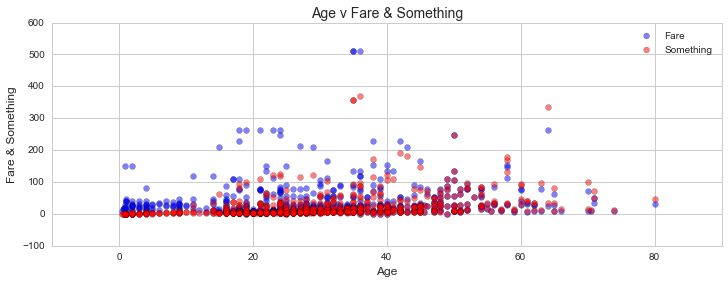

In [56]:
# plot 2 ys on one x
fig = plt.figure(figsize=(12,4))
ax = fig.gca()
x = titanic['Age']
y = titanic['Fare']
y2 = titanic['Something']     

ax.set_xlabel('Age', size=12)
ax.set_ylabel('Fare & Something', size=12)
ax.set_title('Age v Fare & Something', size=14)
ax.scatter(x,y, s=35, alpha=.5, c='blue', label='Fare')
ax.scatter(x,y2, s=35, alpha=.5, c='red', label='Something')

#legend reads label in 
ax.legend(loc='upper right')

plt.show()

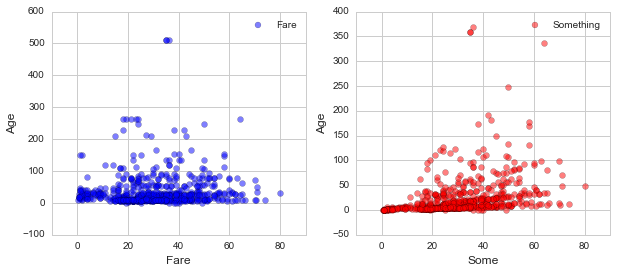

In [68]:
# multiple axis on same figure
# plot age vs fare on the left axis
# plot age vs something on the right axis

#1 = rows, 2 = cols
fig, ax_array = plt.subplots(1,2, figsize=(10,4))
#ax_array([first plot, second plot])
ax_array[0].scatter(x,y, s=35, alpha=.5, c='blue', label='Fare')
ax_array[1].scatter(x,y2, s=35, alpha=.5, c='red', label='Something')

ax_array[0].set_xlabel('Fare', size=12)
ax_array[0].set_ylabel('Age', size=12)
ax_array[1].set_xlabel('Some', size=12)
ax_array[1].set_ylabel('Age', size=12)

ax_array[0].legend(loc='upper right')
ax_array[1].legend(loc='upper right')

#plt.show() <-- no show()


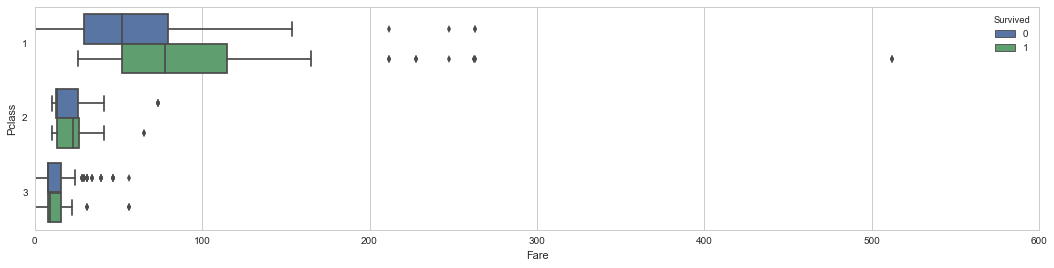

In [76]:
# horizontal boxplot
# y = pclass, x = fare
fig = plt.figure(figsize=(18,4))
ax = fig.gca()

sns.boxplot(x=titanic['Fare'], y=titanic['Pclass'], hue=titanic['Survived'], orient='h',)
plt.show()


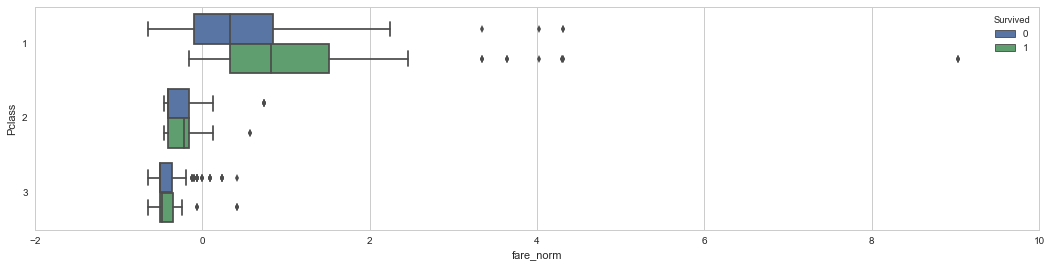

In [79]:
titanic['fare_norm'] = (titanic['Fare'] - titanic['Fare'].mean())/titanic['Fare'].std()
# this doesn't work because should be normalized by pclass - maybe w groupby
fig = plt.figure(figsize=(18,4))
ax = fig.gca()

sns.boxplot(x=titanic['fare_norm'], y=titanic['Pclass'], hue=titanic['Survived'], orient='h',)
plt.show()

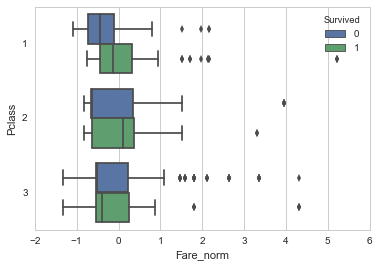

In [82]:
#normalize fare by class, replot
def normalize(df):
    df['Fare_norm'] = (df['Fare'] - df['Fare'].mean())/df['Fare'].std()
    return df

titanic = titanic.groupby('Pclass').apply(normalize)

sns.boxplot(x=titanic['Fare_norm'], y=titanic['Pclass'], hue=titanic['Survived'], orient='h')


In [84]:
# using pivot_table, calc mean of fare for each pclass
# pd.pivot_table(...) aggfunc defaults to mean

titanic_wide = pd.pivot_table(titanic, columns='Pclass', values='Fare', aggfunc=np.mean )
titanic_wide

Pclass
1    88.048121
2    21.471556
3    13.229435
Name: Fare, dtype: float64

In [91]:
# same thing, but get the mean and std dev for fare by pclass

titanic_wide = pd.pivot_table(titanic, columns='Pclass', values='Fare', aggfunc=[np.mean,np.std])
titanic_wide

,mean,std
Pclass,,
1,88.048121,81.293524
2,21.471556,13.187429
3,13.229435,10.043158


In [92]:
# same thing, but get the mean and std dev for fare by pclass and survival

titanic_wide = pd.pivot_table(titanic, columns=['Pclass','Survived'], values='Fare', aggfunc=[np.mean,np.std])
titanic_wide

mean        std
Pclass Survived                      
1      0         67.356313  58.936522
       1         99.083752  89.279720
2      0         20.754953  15.009893
       1         22.248595  10.912328
3      0         13.180014  10.031112
       1         13.386421  10.139398

In [106]:
# same thing, but get the mean and std dev for fare and age by pclass and survival

titanic_wide = pd.pivot_table(titanic, columns=['Pclass','Survived'], values=['Fare','Age'], aggfunc=[np.mean,np.std])
titanic_wide

mean        std
     Pclass Survived                      
Fare 1      0         67.356313  58.936522
            1         99.083752  89.279720
     2      0         20.754953  15.009893
            1         22.248595  10.912328
     3      0         13.180014  10.031112
            1         13.386421  10.139398
Age  1      0         43.695312  15.284243
            1         35.124333  13.654375
     2      0         33.544444  12.151581
            1         25.901566  14.837787
     3      0         26.555556  12.334882
            1         20.646118  11.995047

In [113]:
#titanic_wide = titanic_wide.reset_index()
#titanic_wide['person'] = range(titanic_wide.shape[0])
titanic_wide=titanic_wide.rename(columns={'level_0': 'fare_or_age'})
titanic_wide.head(20)

,fare_or_age,Pclass,Survived,mean,std,person
0,Fare,1,0,67.356313,58.936522,0
1,Fare,1,1,99.083752,89.279720,1
2,Fare,2,0,20.754953,15.009893,2
3,Fare,2,1,22.248595,10.912328,3
4,Fare,3,0,13.180014,10.031112,4
5,Fare,3,1,13.386421,10.139398,5
6,Age,1,0,43.695312,15.284243,6
7,Age,1,1,35.124333,13.654375,7
8,Age,2,0,33.544444,12.151581,8
9,Age,2,1,25.901566,14.837787,9


In [114]:
titanic_long = pd.melt(titanic_wide, id_vars = 'person')
titanic_long.sort_values('person', ascending=1).head(20)

,person,variable,value
0,0,fare_or_age,Fare
24,0,Survived,0
36,0,mean,67.3563
12,0,Pclass,1
48,0,std,58.9365
37,1,mean,99.0838
25,1,Survived,1
49,1,std,89.2797
13,1,Pclass,1
1,1,fare_or_age,Fare
